# Homework #4

## Regularization in Machine Learning

This colaboratory contains Homework #4 of the Machine Learning course, which is due **November 03, midnight (23:59 EEST time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.


## Submission's rules:

1.   Please, submit only .ipynb that you extract from the Colaboratory.
2. Run your homework exercises before submitting (output should be present, preferably restart the kernel and press run all the cells).
3. Do not change the description of tasks in red (even if there is a typo|mistake|etc).
4. Please, make sure to avoid unnecessary long printouts.
5. Each task should be solved right under the question of the task and not elsewhere.
6. Solutions to both regular and bonus exercises should be submitted in one IPYNB file.

Please, steer clear of copying someone else's work. If you discuss assignments with anyone in the course, please, mention their names here:
1. Pooh

##List of Homework's exercises:

1.   [Ex1](#scrollTo=j5oTPhWPwHuP) - 4 points
2.   [Ex2](#scrollTo=Gqw_WFbk4izQ) - 6 points
3.   [Bonus 1](#scrollTo=jdZkblZW7bEp) - up to 4 points (based on quality of presentation)


## Homework exercise 1: Impact of Feature Selection and Regularisation on Logistic Regression Models (4 points)

<font color='red'>  In this exercise, you will explore how feature selection and regularisation affect the performance of logistic regression models. You will apply Lasso (L1 regularisation) for feature selection, train classification models with different settings, and evaluate their performance to identify signs of overfitting, underfitting, or achieving a good fit.  </font>

In [1]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer


<font color='red'> **(Homework exercise 1- a)** To prepare the data for training, you need to complete several prepropressing steps: balance the dataset (use [`SMOTE`](https://imbalanced-learn.org/stable/over_sampling.html#)), handle numerical and categorical features (use `OneHotEncoder()` for categorical features and `StandardScaler()` for numerical), impute the missing values (use [`sklearn Simple Imputer`](https://scikit-learn.org/1.5/modules/impute.html )) and split into training and test sets.

**Make sure to perform the operations in correct order!** **(1.5 points)** </font>


In [2]:
# Fetching the dataset SpeedDating from OPENML library (https://www.openml.org/search?type=data&sort=nr_of_likes&status=active&id=40536)
dating = fetch_openml(data_id=40536)

In [3]:
dating.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 121 entries, has_null to match
dtypes: category(62), float64(57), int64(2)
memory usage: 4.3 MB


In [4]:
dating.data

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met
0,0,1,female,21.0,27.0,6,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,2.0,4.0,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0
1,0,1,female,21.0,22.0,1,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,2.0,4.0,[0-4],[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0
2,1,1,female,21.0,22.0,1,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,...,2.0,4.0,[0-4],[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0
3,0,1,female,21.0,23.0,2,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,2.0,4.0,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0
4,0,1,female,21.0,24.0,3,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,...,2.0,4.0,[0-4],[0-3],[3-5],6.0,6.0,[6-8],[5-6],0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,1,21,male,25.0,26.0,1,[0-1],European/Caucasian-American,Latino/Hispanic American,0,...,NaN,3.0,[7-10],[0-3],[3-5],2.0,5.0,[0-5],[5-6],0.0
8374,1,21,male,25.0,24.0,1,[0-1],European/Caucasian-American,Other,0,...,NaN,3.0,[7-10],[0-3],[3-5],4.0,4.0,[0-5],[0-4],0.0
8375,1,21,male,25.0,29.0,4,[4-6],European/Caucasian-American,Latino/Hispanic American,0,...,NaN,3.0,[7-10],[0-3],[3-5],6.0,5.0,[6-8],[5-6],0.0
8376,1,21,male,25.0,22.0,3,[2-3],European/Caucasian-American,Asian/Pacific Islander/Asian-American,0,...,NaN,3.0,[7-10],[0-3],[3-5],5.0,5.0,[0-5],[5-6],0.0


In [5]:
dating.target #labels

,match
0,0
1,0
2,1
3,1
4,1
...,...
8373,0
8374,0
8375,0
8376,0


In [6]:
#### YOUR CODE STARTS ####
...#feel free to use more cells

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import pandas as pd
#### YOUR CODE ENDS ####

In [7]:
df = dating.frame.copy()
X = df.drop(columns=['match'])
y = df['match'].astype(int)

In [8]:
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['category', 'object']).columns

In [9]:
# Numerical and categorical transformers
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [10]:
# Column transformer to apply transformations to correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)
# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Step 4: Balance the dataset with SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_processed, y)
# Step 5: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Output shapes to verify the process
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(11196, 500), y_train=(11196,)
Test set shape: X_test=(2800, 500), y_test=(2800,)


In [11]:

# Retrieve transformed column names from the preprocessor
num_features = list(num_cols)
cat_features = list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols))
all_features = num_features + cat_features

# Convert X_train and X_test back to DataFrames
X_train_df = pd.DataFrame(X_train.toarray(), columns=all_features)
X_test_df = pd.DataFrame(X_test.toarray(), columns=all_features)

# Display the first few rows of each to check
print("Training Data sample are:")
display(X_train_df.head())

print("\nTest Data sample  :")
display(X_test_df.head())

Training Data sample are:


,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,d_expected_num_interested_in_me_[4-9],d_expected_num_matches_[0-2],d_expected_num_matches_[3-5],d_expected_num_matches_[5-18],d_like_[0-5],d_like_[6-8],d_like_[9-10],d_guess_prob_liked_[0-4],d_guess_prob_liked_[5-6],d_guess_prob_liked_[7-10]
0,-0.656470,1.191688,0.850679,-0.647989,-0.277108,-0.159084,-0.438313,-0.735970,0.223926,0.148972,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.058530,-0.383199,-1.232616,-0.257970,-0.983300,2.273920,1.000204,3.226223,-2.263554,-2.059639,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,-0.058530,0.462760,-0.667844,-0.040385,-0.983300,-0.949794,0.600271,-1.055780,-0.040134,0.419919,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.275794,-0.383199,0.744089,-0.040385,-0.983300,-0.949794,-0.199594,-0.342113,-0.040134,-0.406600,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.608632,-0.947172,1.026475,0.612371,-0.983300,0.124777,-0.999459,0.371554,-0.040134,-1.233120,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0



Test Data sample  :


,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,d_expected_num_interested_in_me_[4-9],d_expected_num_matches_[0-2],d_expected_num_matches_[3-5],d_expected_num_matches_[5-18],d_like_[0-5],d_like_[6-8],d_like_[9-10],d_guess_prob_liked_[0-4],d_guess_prob_liked_[5-6],d_guess_prob_liked_[7-10]
0,-0.392111,-0.383199,-0.950230,-0.475556,-0.630204,-0.949794,0.251530,0.078951,-0.724947,0.504224,...,0.0,1.0,0.0,0.0,0.0,0.000000,1.000000,0.0,1.000000,0.000000
1,-0.392111,-0.383199,0.461702,-0.257970,-0.983300,-0.949794,-0.756300,0.619910,-0.427009,-0.011524,...,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.0,0.000000,1.000000
2,-1.226063,0.462760,0.062933,-0.603466,-0.983300,-0.949794,-0.905333,-0.719848,-0.040134,0.419919,...,0.0,0.0,0.0,1.0,0.0,0.235356,0.764644,0.0,0.000000,1.000000
3,-0.058530,1.590706,-0.667844,0.829957,-0.277108,-0.233413,-0.199594,0.371554,0.701006,1.246439,...,0.0,1.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.000000,0.000000
4,0.608632,-0.665186,-0.561777,-0.693141,-0.983300,-0.949794,-0.199594,-0.119309,0.469625,-0.148564,...,0.0,0.0,1.0,0.0,0.0,1.000000,0.000000,0.0,0.312196,0.687804


In [12]:
# Get column names after transformation to verify the total count and print them
num_features = list(num_cols)
cat_features = list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols))
all_features = num_features + cat_features

# Check the total number of columns and print the first 500 column names if they exist
print(f"Total  columns after preprocessing: {len(all_features)}")
print("First 500 feature names:")
print(all_features[:500])  # Print only the first 500 to avoid overwhelming output


X_train_df.shape, y_train.shape

Total  columns after preprocessing: 500
First 500 feature names:
['wave', 'age', 'age_o', 'd_age', 'importance_same_race', 'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate', 'expected_happy_with_sd_people', 'expected_num_interested_in_me', 'expected_num_matches', 'like', '

((11196, 500), (11196,))

<font color='red'> **(Homework exercise 1- b)** Perform feature selection using Lasso and print the names of the selected features

TIPS: You can select the regularization parameter by trial-and error and see when the results seem reasonable, you don't have to do cross-validation here.
**(1 point)**</font>

In [13]:
#### YOUR CODE STARTS ####
...#feel free to use more cells
alpha = 0.01
lasso = Lasso(alpha=alpha, random_state=42)

# Fit the Lasso model on the training data
lasso.fit(X_train, y_train)

# Get the names of features selected by Lasso (non-zero coefficients)
selected_features = np.array(all_features)[lasso.coef_ != 0]

# Print the selected features
print(f"Selected features with alpha={alpha}:")
print(selected_features)
print(f"Total number of selected features: {len(selected_features)}")


#### YOUR CODE ENDS ####

Selected features with alpha=0.01:
['d_age' 'importance_same_race' 'pref_o_intelligence' 'attractive_o'
 'funny_o' 'ambitous_o' 'shared_interests_o' 'intellicence_important'
 'funny_important' 'attractive' 'intelligence' 'attractive_partner'
 'funny_partner' 'sports' 'exercise' 'clubbing' 'shopping'
 'interests_correlate' 'expected_num_interested_in_me'
 'expected_num_matches' 'like' 'guess_prob_liked' 'd_attractive_o_[6-8]'
 'd_funny_o_[6-8]' 'd_shared_interests_o_[0-5]'
 'd_shared_interests_o_[6-8]' 'd_funny_[9-10]'
 'd_attractive_partner_[6-8]' 'd_shared_interests_partner_[0-5]'
 'd_shared_interests_partner_[6-8]' 'd_like_[6-8]']
Total number of selected features: 31


<font color='red'> **(Homework exercise 1- c)** Train four logistic regression models:

1.   Train on **all** features **without** L2 regularisation
2.   Train on **all** features **with** L2 regularisation
3.   Train on **selected** features (from your Lasso feature selection) **without** L2 regularisation
4.   Train on **selected** features (from your Lasso feature selection)  
<font color='red'>**(1 point)**</font>

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
# Model1: train on all features without L2 regularisation
#### YOUR CODE STARTS ####
...#feel free to use more cells
model_all_no_reg = LogisticRegression(penalty=None, random_state=42, max_iter=1000)
model_all_no_reg.fit(X_train, y_train)
y_pred_all_no_reg = model_all_no_reg.predict(X_test)

# Calculate accuracies
train_accuracy_all_no_reg = model_all_no_reg.score(X_train,y_train)
print("train",train_accuracy_all_no_reg)
test_accuracy_all_no_reg = accuracy_score(y_test, y_pred_all_no_reg)
print("test",test_accuracy_all_no_reg)
#### YOUR CODE ENDS ####

train 0.859146123615577
test 0.8325


In [16]:
# Model2: train on all features with L2 regularisation
#### YOUR CODE STARTS ####
...#feel free to use more cells
alpha = 0.01
lasso = Lasso(alpha=alpha, random_state=42)
lasso.fit(X_train, y_train)
# Check the coefficients
#print("Lasso coefficients:", lasso.coef_)

# Check number of selected features
#print("Number of selected features:", np.sum(lasso.coef_ != 0))

model_all_l2 = LogisticRegression(penalty='l2', random_state=42, max_iter=1000)
model_all_l2.fit(X_train, y_train)
y_pred_all_l2 = model_all_l2.predict(X_test)

# Calculate accuracies
train_accuracy_all_l2 = model_all_l2.score(X_train,y_train)
print("Train Accuracy (All features, L2):",train_accuracy_all_l2)
test_accuracy_all_l2 = accuracy_score(y_test, y_pred_all_l2)
print("test Accuracy (All features, L2):", test_accuracy_all_l2)
#### YOUR CODE ENDS ####

Train Accuracy (All features, L2): 0.8577170418006431
test Accuracy (All features, L2): 0.8260714285714286


In [17]:
# Model3: train on selected features without L2 regularisation
#### YOUR CODE STARTS ####
...#feel free to use more cells
alpha = 0.01

lasso = Lasso(alpha=alpha, random_state=42)
lasso.fit(X_train, y_train)

# Check number of selected features
print("Number of selected features:", np.sum(lasso.coef_ != 0))

# Check if any features were selected by Lasso
if np.any(lasso.coef_ != 0):
    X_train_selected = X_train[:, lasso.coef_ != 0]
    X_test_selected = X_test[:, lasso.coef_ != 0]

    model_selected_no_reg = LogisticRegression(penalty=None, random_state=42, max_iter=1000)
    model_selected_no_reg.fit(X_train_selected, y_train)

     # Calculate training accuracy
    y_pred_train = model_selected_no_reg.predict(X_train_selected)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print("Training Accuracy (Selected features, no L2):", accuracy_train)

    y_pred_selected_no_reg = model_selected_no_reg.predict(X_test_selected)
    accuracy_selected_no_reg = accuracy_score(y_test, y_pred_selected_no_reg)
    print("Test Accuracy (Selected features, no L2):", accuracy_selected_no_reg)





#### YOUR CODE ENDS ####

Number of selected features: 31
Training Accuracy (Selected features, no L2): 0.809038942479457
Test Accuracy (Selected features, no L2): 0.8007142857142857


In [18]:
# Model4: train on selected features with L2 regularisation
#### YOUR CODE STARTS ####
... #feel free to use more cells
alpha = 0.01
lasso = Lasso(alpha=alpha, random_state=42)
lasso.fit(X_train, y_train)
# Check the coefficients
#print("Lasso coefficients:", lasso.coef_)

# Select features based on non-zero coefficients
X_train_selected = X_train[:, lasso.coef_ != 0]
X_test_selected = X_test[:, lasso.coef_ != 0]

# Model 2: All features, with L2 regularization (penalty='l2', default)
# Check number of selected features
print("Number of selected features:", np.sum(lasso.coef_ != 0))

# Proceed only if features were selected
if X_train_selected.shape[1] > 0:
  model_selected_l2 = LogisticRegression(penalty='l2', random_state=42, max_iter=1000)
  model_selected_l2.fit(X_train_selected, y_train)

  # Calculate training accuracy
  y_pred_train_l2 = model_selected_l2.predict(X_train_selected)
  accuracy_train_l2 = accuracy_score(y_train, y_pred_train_l2)
  print("Training Accuracy (Selected features, L2):", accuracy_train_l2)

  # Test accuracy (already calculated)
  y_pred_selected_l2 = model_selected_l2.predict(X_test_selected)
  test_accuracy_selected_l2 = accuracy_score(y_test, y_pred_selected_l2)
  print("Test Accuracy (Selected features, L2):", test_accuracy_selected_l2)
#### YOUR CODE ENDS ####

Number of selected features: 31
Training Accuracy (Selected features, L2): 0.8093068953197571
Test Accuracy (Selected features, L2): 0.8007142857142857


<font color='red'> **(Homework exercise 1- d)** Concisely report the accuracies on both training and test sets for all four models from **1-c**. Compare the results across all models. In a separate print statement comment whether any models exhibit overfitting, underfitting, or a normal fit (add reasoning). **(0.5 points)**

In [19]:
#### YOUR CODE STARTS ####
... #feel free to use more cells


print("  Accuracy (All features, no L2):",train_accuracy_all_no_reg, "Test Accuracy (All features, no L2):",test_accuracy_all_no_reg)
print("  Accuracy (All features, with L2):",train_accuracy_all_l2, "Test Accuracy (All features, with L2):",test_accuracy_all_l2)
print("  Accuracy (Selected features, no L2):",accuracy_train, "Test Accuracy (Selected features, no L2):",accuracy_selected_no_reg)
print("  Accuracy (Selected features, with L2):",accuracy_train_l2, "Test Accuracy (Selected features, with L2):",test_accuracy_selected_l2)


#### YOUR CODE ENDS ####

  Accuracy (All features, no L2): 0.859146123615577 Test Accuracy (All features, no L2): 0.8325
  Accuracy (All features, with L2): 0.8577170418006431 Test Accuracy (All features, with L2): 0.8260714285714286
  Accuracy (Selected features, no L2): 0.809038942479457 Test Accuracy (Selected features, no L2): 0.8007142857142857
  Accuracy (Selected features, with L2): 0.8093068953197571 Test Accuracy (Selected features, with L2): 0.8007142857142857


<font color='red'> Please comment whether any models exhibit overfitting, underfitting, or a normal fit (add reasoning).

Your answer: Overfitting:

Model 1 (All Features, No L2 Regularization) shows a slight overfitting. The training accuracy is significantly higher than the test accuracy, suggesting the model has learned noise from the training data that doesn't generalize well to the test data.
Underfitting:

Model 3 (Selected Features, No L2 Regularization) and Model 4 (Selected Features, With L2 Regularization) exhibit slight underfitting. Both models have similar training and test accuracies, indicating that the model hasn't fully captured the underlying patterns in the data. This could be due to the limited number of features or the lack of model complexity.
Normal Fit:

Model 2 (All Features, With L2 Regularization) demonstrates a relatively normal fit. The training and test accuracies are reasonably close, suggesting that the model has learned the underlying patterns without overfitting or underfitting. The L2 regularization likely helped prevent overfitting by penalizing complex models.
Overall, Model 2 (All Features, With L2 Regularization) appears to be the best-performing model based on the balance between training and test accuracy. It achieves a good accuracy on the test set while avoiding significant overfitting.

In [20]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

import os
from PIL import Image # Python Image processing Library

from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout, Normalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

## Homework exercise 2 (6 points): Traffic signs classification
<font color='red'> In the practice session, we were focusing mostly on explicit regularization methods - making changes in model's architecture. Now, in this exercise we will take a different approach - we will transform the dataset instead. Since our beloved MNIST and CIFAR10 are designed in a very nice balanced way, we are introducing a new, trickier dataset for this task - the Belgium Traffic Sign dataset ([BelgiumTSC](https://btsd.ethz.ch/shareddata/)). Our goal here is to classify the traffic signs.

<font color='red'> Firstly, we load the data from Google Drive.

In [21]:
!gdown --fuzzy https://drive.google.com/file/d/1gCq2h-BX0CPHlfbTDEWa0Lzb26ryqQYH/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1gCq2h-BX0CPHlfbTDEWa0Lzb26ryqQYH
From (redirected): https://drive.google.com/uc?id=1gCq2h-BX0CPHlfbTDEWa0Lzb26ryqQYH&confirm=t&uuid=7ae71611-869e-43d4-a02d-8732a99aad99
To: /content/BelgiumTSC.zip
100% 49.4M/49.4M [00:02<00:00, 22.3MB/s]


In [22]:
!unzip -q BelgiumTSC.zip -d data/

<font color='red'> The contents of archive contain 62 folders with .png images of traffic signs and an annotations file with labels and coordinates of signs (we won't use the coordinates as we are interested only in classification).

In [23]:
!ls data/BelgiumTSC/

00000  00005  00010  00015  00020  00025  00030  00035	00040  00045  00050  00055  00060
00001  00006  00011  00016  00021  00026  00031  00036	00041  00046  00051  00056  00061
00002  00007  00012  00017  00022  00027  00032  00037	00042  00047  00052  00057  annotations.csv
00003  00008  00013  00018  00023  00028  00033  00038	00043  00048  00053  00058
00004  00009  00014  00019  00024  00029  00034  00039	00044  00049  00054  00059


In [24]:
!ls  data/BelgiumTSC/00000

00017_00001.png  01153_00002.png  01797_00000.png  01799_00002.png
00021_00000.png  01160_00000.png  01798_00000.png


<font color='red'> We can also take a look at a single image.

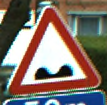

In [25]:
Image.open('./data/BelgiumTSC/00000/01153_00002.png')

In [26]:
# A path to our dataset
dataset_path = '/content/data/BelgiumTSC/'

In [27]:
# Read a csv file with annotations
annt_df = pd.read_csv(os.path.join(dataset_path, 'annotations.csv'))
annt_df.head()

,Filepath,Width,Height,Roi.x1,Roi.y1,Roi.x2,Roi.y2,ClassId
0,00000/01153_00002.png,105,107,9,9,96,98,0
1,00000/01160_00000.png,94,105,8,9,86,95,0
2,00000/01797_00000.png,85,95,7,8,77,87,0
3,00000/01798_00000.png,81,88,7,7,74,81,0
4,00000/01799_00002.png,99,110,8,9,91,100,0


 <font color='red'> Notice that the images have different widths and heights. We will deal with this issue later.

 <font color='red'> Roi.x1, Roi.y1, Roi.x2, and Roi.y2—represent the coordinates of a bounding box that highlights the most relevant or important part of each image. For this homework we will not use the ROI information because our focus here is on the overall image properties and not on extracting important regions.

 <font color='red'>Before loading any images, let's plot the distribution of images per class.

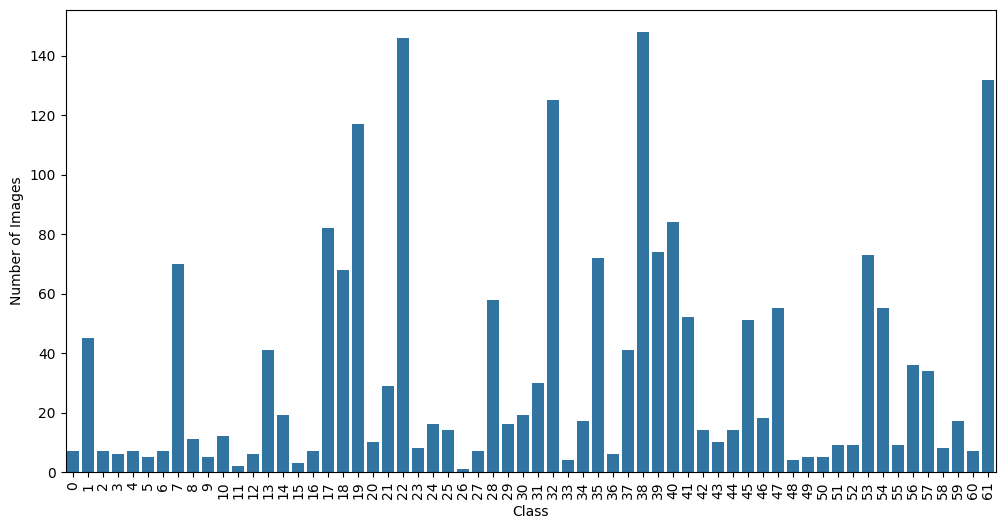

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(x='ClassId', data=annt_df)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.show()

<font color='red'> The dataset is heavily unbalanced, with the largest class containing 70 times more images than the smallest one. To make our lives a bit easier, we will remove any classes that have fewer than 8 images.

<font color='red'> **(Homework exercise 2- a)** Drop rows from the DataFrame where the image class has fewer than 8 samples (i.e., images). Then, rename the remaining classes to ensure that the class labels are sequential with no gaps in the numbering. Explain why 8 was chosen as the minimum number of samples for an image class. **(1 point)**. </font>

In [29]:
##### YOUR CODE STARTS #####
# Count the number of samples per class
class_counts = annt_df['ClassId'].value_counts()

# Filter classes with fewer than 8 images
classes_to_keep = class_counts[class_counts >= 8].index
filtered_df = annt_df[annt_df['ClassId'].isin(classes_to_keep)]

# Renumber the ClassId to ensure they are sequential
filtered_df['ClassId'] = filtered_df['ClassId'].astype('category').cat.codes

# Display the resulting DataFrame
filtered_df.head()

##### YOUR CODE ENDS #####

,Filepath,Width,Height,Roi.x1,Roi.y1,Roi.x2,Roi.y2,ClassId
5,00001/00025_00001.png,82,88,7,7,74,81,0
6,00001/00029_00001.png,73,79,6,7,67,72,0
7,00001/00079_00000.png,100,112,8,9,91,103,0
8,00001/00136_00002.png,51,54,5,5,46,48,0
9,00001/00143_00000.png,49,50,5,5,44,44,0


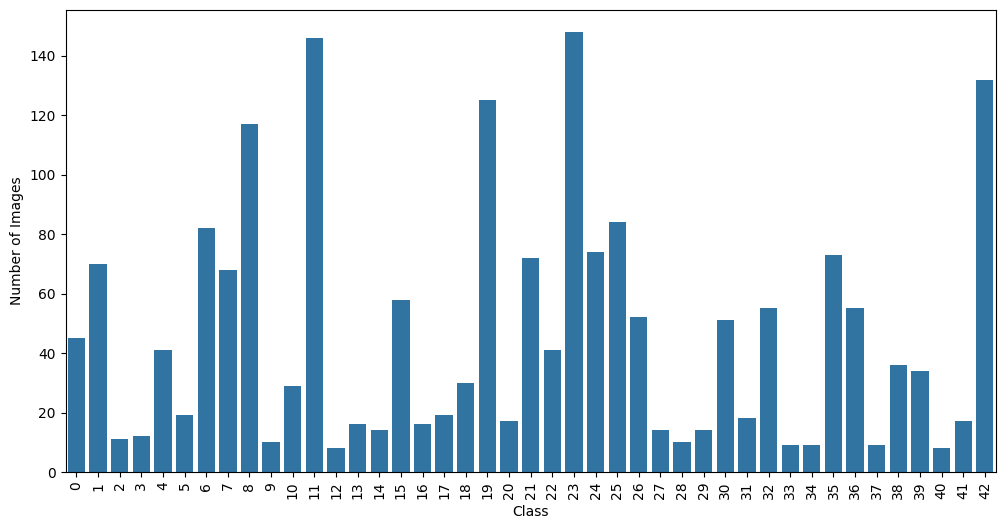

In [30]:

plt.figure(figsize=(12, 6))
sns.countplot(x='ClassId', data=filtered_df)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.show()

<font color='red'>  Explain the rationale behind removing image classes with fewer than 8 samples from the dataset. How this decision may relate to the upcoming split of our dataset into training, validation, and test sets?

Your answer: We filtered the dataset by removing image classes with less than 8 samples. This ensures that the model has enough data to learn from each category, reducing the chance of overfitting and improving the model's ability to generalize to new, unseen data

<font color='red'> **(Homework exercise 2- b)** Split the data into three sets: training, validation and test with 80/10/10 ratio. Make sure that all classes are represented in both the validation and test sets.  **(0.5 points)**. </font>

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assume filtered_df is the DataFrame after filtering classes
# Separate the features and labels
X = filtered_df['Filepath']  # or the appropriate column containing image paths
y = filtered_df['ClassId']

# First, split the data into training and temp sets (80/20 ratio)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Now split the temp set into validation and test sets (50/50 of the 20%, resulting in 10% each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Create DataFrames for each set
train_df = pd.DataFrame({'Filepath': X_train, 'ClassId': y_train})
val_df = pd.DataFrame({'Filepath': X_val, 'ClassId': y_val})
test_df = pd.DataFrame({'Filepath': X_test, 'ClassId': y_test})
##### YOUR CODE ENDS #####

In [32]:
# Check whether all classes are present in val and test sets
assert len(train_df['ClassId'].unique()) == len(val_df['ClassId'].unique())
assert len(train_df['ClassId'].unique()) == len(test_df['ClassId'].unique())

<font color='red'>  Now, we are ready to read in the actual images and do simple preprocessing on them, such as resize all images into 100x100 shape and then normalize them. This code is provided for you.

In [33]:
def load_image(image_path):
  # Load the image
  image = Image.open(image_path)

  # Resize the image
  image = image.resize((100, 100))

  # Normalize the image
  image = np.array(image) / 255.0 # basic normalisation

  return image

In [34]:
X_train, X_val, X_test = [], [], []

# Load images from the dataset
for i, row in train_df.iterrows():
  X_train.append(load_image(dataset_path + row['Filepath']))

for i, row in val_df.iterrows():
  X_val.append(load_image(dataset_path + row['Filepath']))

for i, row in test_df.iterrows():
  X_test.append(load_image(dataset_path + row['Filepath']))

# Convert the lists of images to numpy arrays for easier manipulation
X_train = np.stack(X_train)
X_val = np.stack(X_val)
X_test = np.stack(X_test)

# Extract the class labels for training, validation, and test sets
y_train = train_df['ClassId'].values
y_val = val_df['ClassId'].values
y_test = test_df['ClassId'].values

In [35]:
# Take a look at shapes:
X_train.shape, y_train.shape

((1574, 100, 100, 3), (1574,))

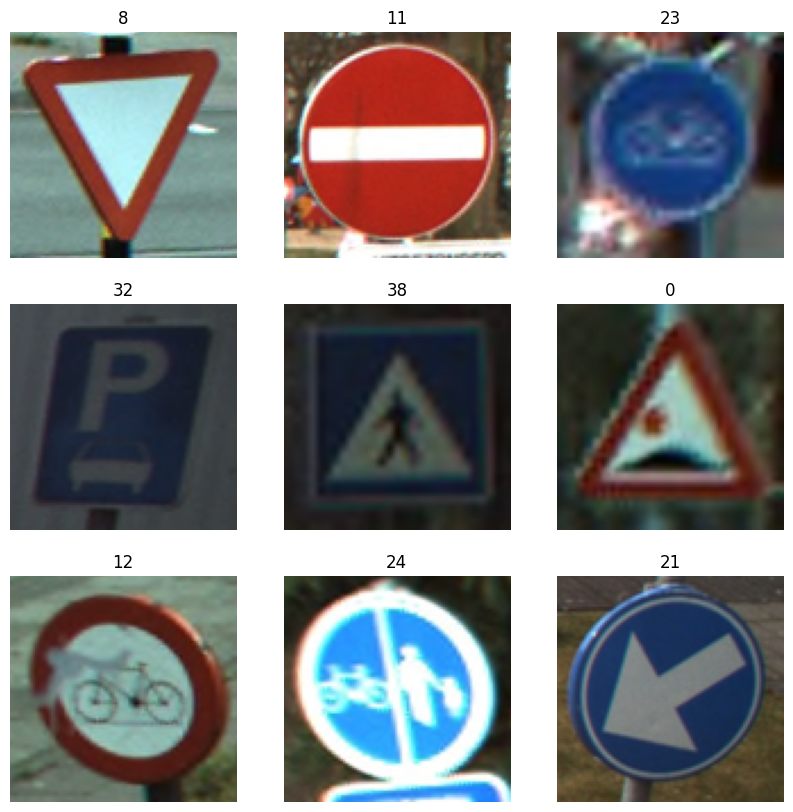

In [36]:
# Visualise nine random images
plt.figure(figsize=(10, 10))

for i in range(9):
    indx = np.random.randint(0, len(X_train))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow((X_train[indx] * 255).astype('uint8'))
    plt.title(y_train[indx])
    plt.axis("off")

<font color='red'> **(Homework exercise 2- c)** Use your best-performing model from Task 2 of Homework 3 to train on the traffic sign image dataset. Plot the learning curves to visualize the model’s performance over time. Adjust the number of training epochs so that the process stops when the validation loss no longer improves.  **(1 point)**. </font>

In [37]:
def build_model():
    x = Input(shape=(100, 100, 3))  # Adjusted to 100x100 input shape

    # First convolutional block
    c1 = Conv2D(32, (3, 3), strides=(1, 1), padding="same")(x)
    b1 = BatchNormalization()(c1)
    a1 = Activation('tanh')(b1)

    # Second convolutional block
    c2 = Conv2D(32, (3, 3), strides=(1, 1), padding="same")(a1)
    b2 = BatchNormalization()(c2)
    a2 = Activation('tanh')(b2)
    p2 = MaxPooling2D(pool_size=2)(a2)
    d2 = Dropout(rate=0.25)(p2)

    # Third convolutional block
    c3 = Conv2D(64, (3, 3), strides=(1, 1), padding="same")(d2)
    b3 = BatchNormalization()(c3)
    a3 = Activation('tanh')(b3)
    p3 = MaxPooling2D(pool_size=2)(a3)
    d3 = Dropout(rate=0.25)(p3)

    # Flatten and fully connected layers
    f3 = Flatten()(d3)
    h4 = Dense(128)(f3)
    b4 = BatchNormalization()(h4)
    a4 = Activation('tanh')(b4)
    d4 = Dropout(rate=0.5)(a4)

    # Output layer
    z = Dense(62)(d4)  # Adjust the number of classes if necessary
    p = Activation('softmax')(z)

    # Create and compile model
    model = Model(inputs=x, outputs=p)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model
  ##### YOUR CODE ENDS #####

In [38]:
model1 = build_model()
model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100, 100, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100, 100, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50, 50, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 40000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,120,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,157,790 (19.68 MB)

 Trainable params: 5,157,278 (19.67 MB)

 Non-trainable params: 512 (2.00 KB)

In [39]:
histories = []

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
# Train your model. IMPORTANT: If you decide to resume training, ensure that you
# correctly set the initial_epoch parameter to continue from where training left
# off.
##### YOUR CODE STARTS #####
# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model and store training history for learning curve plots
history = model1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Start with a higher number to let early stopping decide when to stop
    callbacks=[early_stopping],
    batch_size=32
)


# initial_epoch, is a parameter that sets the epoch at which to start training
# (useful for resuming a previous training run).
##### YOUR CODE ENDS #####

histories.append(history) # In case you want to continue training but don't want
                          # to loose the training history

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 195ms/step - accuracy: 0.4270 - loss: 2.6279 - val_accuracy: 0.4873 - val_loss: 2.3610
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8461 - loss: 0.8182 - val_accuracy: 0.6041 - val_loss: 1.7448
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9558 - loss: 0.3589 - val_accuracy: 0.7259 - val_loss: 1.1577
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9823 - loss: 0.1986 - val_accuracy: 0.8325 - val_loss: 0.8959
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9926 - loss: 0.1155 - val_accuracy: 0.8426 - val_loss: 0.6755
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9916 - loss: 0.0989 - val_accuracy: 0.9188 - val_loss: 0.4443
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 1.0000 - loss: 0.0535 - val_accuracy: 0.9239 - val_loss: 0.3867
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 1.0000 - loss: 0.0343 - val_accuracy: 0.9239 -

In [41]:
def plot_history(histories):
    combined_loss = []
    combined_val_loss = []
    combined_accuracy = []
    combined_val_accuracy = []

    for history in histories:
        combined_loss.extend(history.history['loss'])
        combined_val_loss.extend(history.history['val_loss'])
        combined_accuracy.extend(history.history['accuracy'])
        combined_val_accuracy.extend(history.history['val_accuracy'])

    epochs = range(1, len(combined_loss) + 1)

    plt.figure(figsize=(16, 6))

    # Plot for Loss
    plt.subplot(1, 2, 1)
    plt.plot(combined_loss)
    plt.plot(combined_val_loss)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss')
    plt.xticks(range(len(combined_loss)), epochs)

    # Plot for Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(combined_accuracy)
    plt.plot(combined_val_accuracy)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    plt.title('Accuracy')
    plt.xticks(range(len(combined_accuracy)), epochs)

    plt.show()

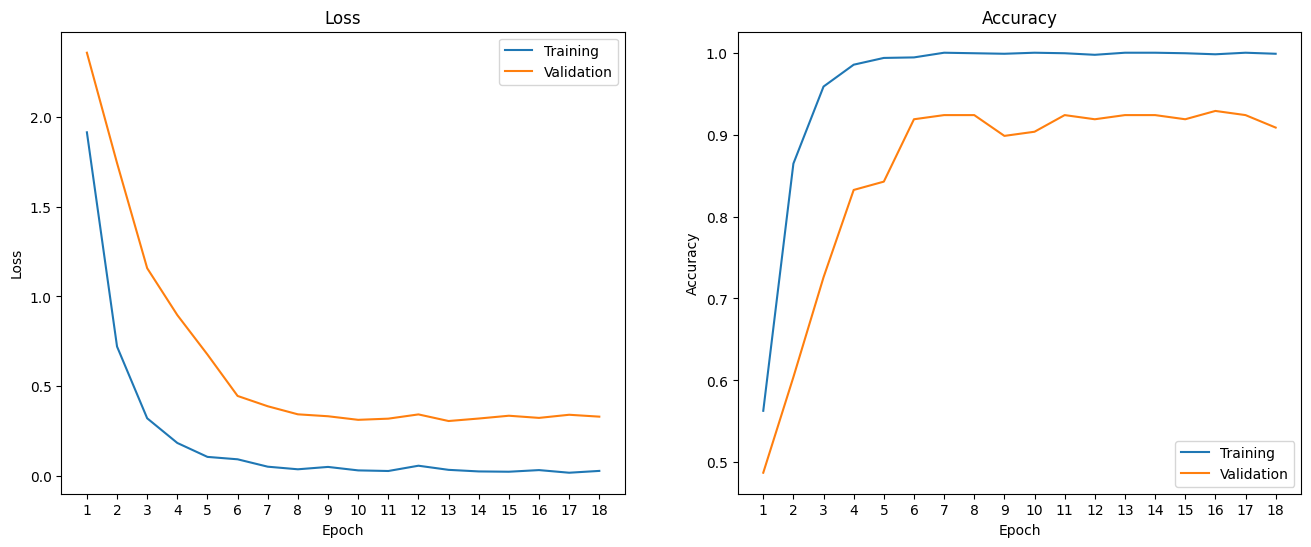

In [42]:
plot_history(histories)

 <font color='red'> **(Homework exercise 2- d)**
Evaluate the model by calculating the overall accuracy as well as the accuracy for each individual class on the test set **(0.5 points)**.</font>

In [43]:
def get_predictions(model, X):

  # Make predictions
  y_pred = model.predict(X, batch_size = 64)
  # Convert the predicted probabilities to class labels by
  # taking the index of the highest value for each prediction
  y_pred = np.argmax(y_pred, axis=1)

  return y_pred

In [44]:
y_test_predictions = get_predictions(model1, X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step


In [45]:
# Calulate the overall accuracy on test set
##### YOUR CODE STARTS #####
from sklearn.metrics import accuracy_score, classification_report
test_accuracy=accuracy_score(y_test, y_test_predictions)
##### YOUR CODE ENDS #####
print(f'Test accuracy is {test_accuracy:.2f}') # It should be about 90%

Test accuracy is 0.94


In [46]:
# Calulate accuracy for each individual class on test set
def per_class_accuracy_score(predictions, labels):
  ##### YOUR CODE STARTS #####
  report = classification_report(labels, predictions, output_dict=True)

    # Extract accuracy (recall) per class
  class_accuracies = {f"Class {cls}": round(report[str(cls)]['recall'], 2) for cls in sorted(set(labels))}

    # Display accuracies for each class
  for cls, acc in class_accuracies.items():
      print(f"{cls} accuracy: {acc}")
  ##### YOUR CODE ENDS #####

In [47]:
# Print out computed accuracies
per_class_accuracy_score(y_test_predictions, y_test)

Class 0 accuracy: 1.0
Class 1 accuracy: 1.0
Class 2 accuracy: 1.0
Class 3 accuracy: 1.0
Class 4 accuracy: 1.0
Class 5 accuracy: 0.5
Class 6 accuracy: 1.0
Class 7 accuracy: 0.71
Class 8 accuracy: 0.92
Class 9 accuracy: 1.0
Class 10 accuracy: 1.0
Class 11 accuracy: 1.0
Class 12 accuracy: 1.0
Class 13 accuracy: 0.0
Class 14 accuracy: 1.0
Class 15 accuracy: 1.0
Class 16 accuracy: 1.0
Class 17 accuracy: 1.0
Class 18 accuracy: 1.0
Class 19 accuracy: 1.0
Class 20 accuracy: 1.0
Class 21 accuracy: 1.0
Class 22 accuracy: 1.0
Class 23 accuracy: 1.0
Class 24 accuracy: 0.71
Class 25 accuracy: 1.0
Class 26 accuracy: 1.0
Class 27 accuracy: 0.0
Class 28 accuracy: 0.0
Class 29 accuracy: 1.0
Class 30 accuracy: 1.0
Class 31 accuracy: 0.5
Class 32 accuracy: 1.0
Class 33 accuracy: 1.0
Class 34 accuracy: 1.0
Class 35 accuracy: 1.0
Class 36 accuracy: 1.0
Class 37 accuracy: 1.0
Class 38 accuracy: 1.0
Class 39 accuracy: 1.0
Class 40 accuracy: 1.0
Class 41 accuracy: 1.0
Class 42 accuracy: 1.0


<font color='red'> For how many classes your model showed zero accuracy?

Your answer: three

<font color='red'> **(Homework exercise 2- e)** Implement a basic oversampling strategy by duplicating images until each class has at least `n` samples in the training set. Choose `n` yourself. Train the model on oversampled training set and evaluate on the test set. Adjust the number of epochs so that the training stops when the validation loss stops improving. **(1.5 points)**. </font>

In [48]:
def oversample_minority_classes(df, n):
  ##### YOUR CODE STARTS #####
    oversampled_df = pd.DataFrame(columns=df.columns)  # Initialize an empty DataFrame
    class_counts = df['ClassId'].value_counts()  # Count instances per class

    for class_id, count in class_counts.items():
        # Get all samples of the current class
        class_samples = df[df['ClassId'] == class_id]

        # If class has fewer than `n` samples, duplicate randomly selected samples until it reaches `n`
        if count < n:
            extra_samples = class_samples.sample(n=n - count, replace=True, random_state=42)
            class_samples = pd.concat([class_samples, extra_samples], axis=0)

        # Add to the oversampled DataFrame
        oversampled_df = pd.concat([oversampled_df, class_samples], axis=0)

    # Shuffle the oversampled DataFrame
    oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

    return oversampled_df  ##### YOUR CODE ENDS #####

In [49]:
# Now choose value n wisely
oversampled_train_df = oversample_minority_classes(train_df, n = 100)

In [50]:
len(oversampled_train_df)

4341

<font color='red'> What value of `n` did you choose and why?

Your answer: To make the dataset more balanced, we oversampled the underrepresented classes to a minimum of 100 samples per class. This helps the model learn from all classes equally, leading to better predictions

In [51]:
X_train_oversampled = []

for i, row in oversampled_train_df.iterrows():
  X_train_oversampled.append(load_image(dataset_path + row['Filepath']))

X_train_oversampled = np.stack(X_train_oversampled)

y_train_oversampled = oversampled_train_df['ClassId'].values

In [52]:
# We use the same model as in subtask 2-c
model2 = build_model()

In [53]:
histories_2 = []

In [54]:
# Train your model2 with a new oversampled dataset
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Convert y_train_oversampled and y_val to int64 or float32
y_train_oversampled = y_train_oversampled.astype('int64') # or 'float32'
y_val = y_val.astype('int64') # or 'float32'

##### YOUR CODE STARTS #####
history = model2.fit(
    X_train_oversampled, y_train_oversampled,
    validation_data=(X_val, y_val),
    epochs=50,  # Let early stopping decide when to stop
    callbacks=[early_stopping],
    batch_size=32
)
##### YOUR CODE ENDS #####

histories_2.append(history) # In case you want to continue training the model
# for more epochs but don't want to loose the training history

Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.5483 - loss: 1.9947 - val_accuracy: 0.7107 - val_loss: 1.3876
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9950 - loss: 0.1201 - val_accuracy: 0.9036 - val_loss: 0.5946
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9977 - loss: 0.0561 - val_accuracy: 0.9188 - val_loss: 0.3705
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 1.0000 - loss: 0.0230 - val_accuracy: 0.9340 - val_loss: 0.3307
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 1.0000 - loss: 0.0132 - val_accuracy: 0.9391 - val_loss: 0.3072
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 0.9340 - val_loss: 0.3182
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.9340 - val_loss: 0.3050
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 1.0000 - loss: 0.0051 - val_ac

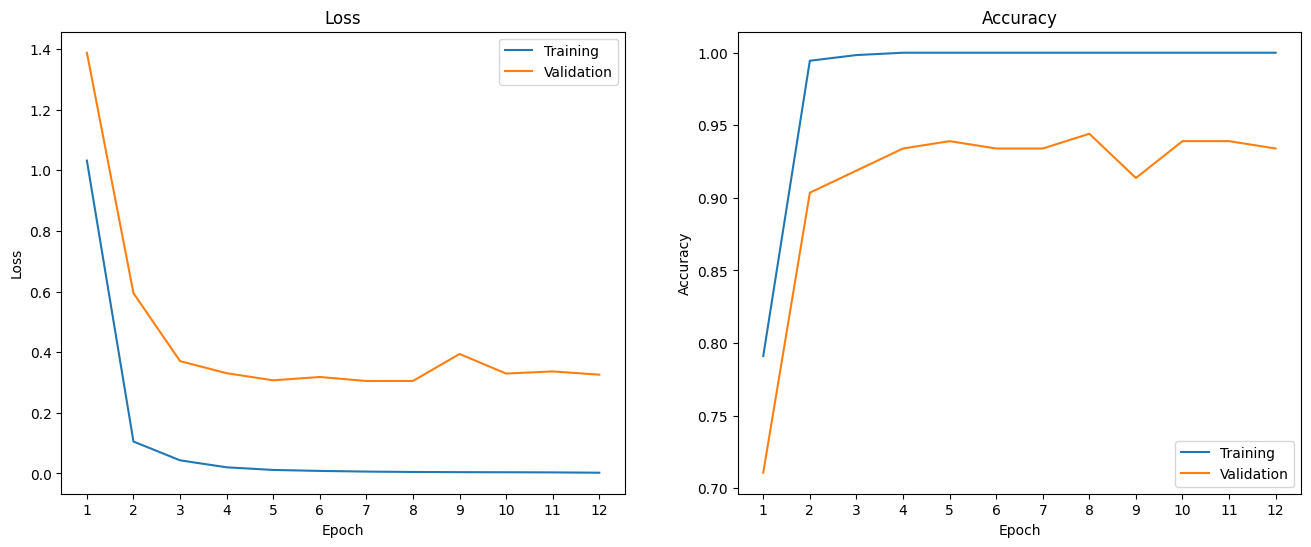

In [55]:
plot_history(histories_2)

In [56]:
y_test_predictions = get_predictions(model2, X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


In [57]:
# Calulate the overall accuracy on test set
##### YOUR CODE STARTS #####
test_accuracy = accuracy_score(y_test, y_test_predictions)
##### YOUR CODE ENDS #####
print(f'Test accuracy is {test_accuracy:.2f}')

Test accuracy is 0.95


In [58]:
# Accuracy for each individual class on test set
per_class_accuracy_score(y_test_predictions, y_test)

Class 0 accuracy: 1.0
Class 1 accuracy: 0.86
Class 2 accuracy: 1.0
Class 3 accuracy: 1.0
Class 4 accuracy: 0.75
Class 5 accuracy: 1.0
Class 6 accuracy: 1.0
Class 7 accuracy: 0.71
Class 8 accuracy: 0.92
Class 9 accuracy: 1.0
Class 10 accuracy: 1.0
Class 11 accuracy: 1.0
Class 12 accuracy: 1.0
Class 13 accuracy: 0.5
Class 14 accuracy: 1.0
Class 15 accuracy: 1.0
Class 16 accuracy: 1.0
Class 17 accuracy: 1.0
Class 18 accuracy: 1.0
Class 19 accuracy: 1.0
Class 20 accuracy: 1.0
Class 21 accuracy: 1.0
Class 22 accuracy: 1.0
Class 23 accuracy: 1.0
Class 24 accuracy: 0.86
Class 25 accuracy: 1.0
Class 26 accuracy: 1.0
Class 27 accuracy: 1.0
Class 28 accuracy: 1.0
Class 29 accuracy: 1.0
Class 30 accuracy: 1.0
Class 31 accuracy: 0.5
Class 32 accuracy: 1.0
Class 33 accuracy: 1.0
Class 34 accuracy: 1.0
Class 35 accuracy: 1.0
Class 36 accuracy: 1.0
Class 37 accuracy: 1.0
Class 38 accuracy: 1.0
Class 39 accuracy: 1.0
Class 40 accuracy: 1.0
Class 41 accuracy: 0.5
Class 42 accuracy: 1.0


<font color='red'> For how many classes your model showed zero accuracy? Is the number smaller than in EX2-d?

Your answer: for none, yeah its smaller in previous was 3.


---



<font color='red'> **(Homework exercise 2- f)** Add three augmentations to the oversampled training data. Think about reasonable augmentations for this dataset. You can use either `tf.keras.preprocessing.image.ImageDataGenerator` as we did in practice session or add augmentation layers from https://keras.io/api/layers/preprocessing_layers/image_augmentation/ on top of your model. Train the model on augmented data and evaluate it. Again, adjust the number of epochs so that the training stops when the validation loss stops improving. **(1.5 points)**. </font>

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
##### YOUR CODE STARTS #####
# Define data augmentation with chosen parameters
datagen = ImageDataGenerator(
    rotation_range=5,             # Small rotation range of -5 to +5 degrees
    width_shift_range=0.02,       # Horizontal shift up to 2% of the image width
    height_shift_range=0.02,      # Vertical shift up to 2% of the image height
    #brightness_range=(0.85, 1.15) # Brightness adjustment between 85% and 115%
    zoom_range=0.1,         # Zoom in on images
    horizontal_flip=False,   # Do not flip horizontally, as this is not reasonable for traffic signs
)

# Apply the augmentation to the oversampled training set
datagen.fit(X_train_oversampled)
##### YOUR CODE ENDS #####

<font color='red'> Make sure that the augmentations aren't too strong and do not distort the images too much.

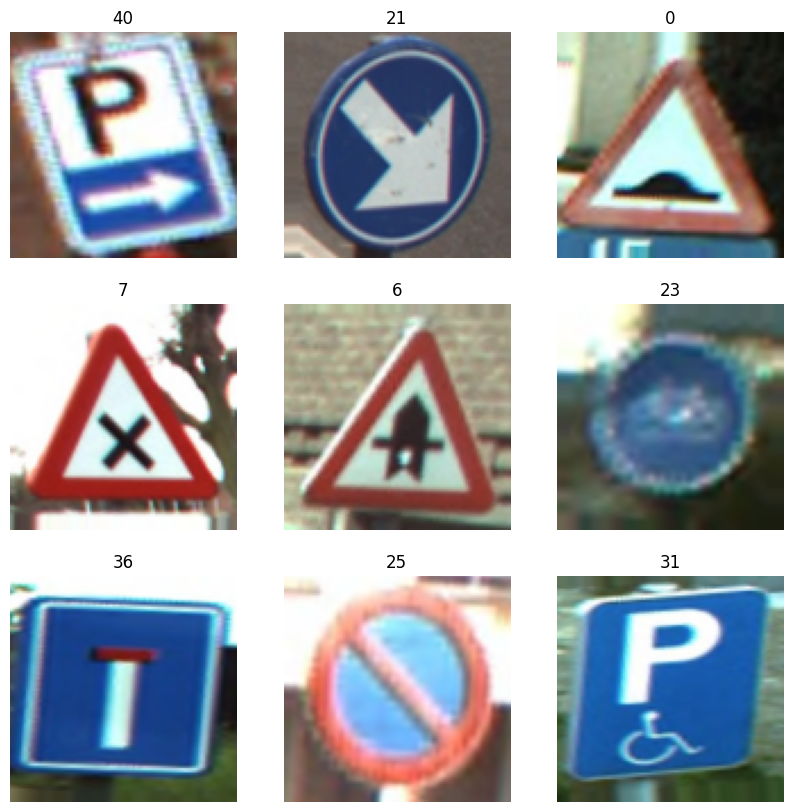

In [60]:
plt.figure(figsize=(10, 10))

for X_batch, y_batch in datagen.flow(X_train_oversampled, y_train_oversampled, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(3, 3, 1 + i)
        plt.imshow((X_batch[i] * 255).astype('uint8'))
        plt.title(y_batch[i])
        plt.axis('off')
    # show the plot
    plt.show()
    break

<font color='red'> Explain why did you choose these augmentations.

Your answer:We initially tried stronger data augmentations, such as rotations and shifts, but they distorted the images too much. So, we switched to more subtle augmentations like small rotations and zooming to improve the model's performance.





In [61]:
# We use the same model as in subtask 2-c
model3 = build_model()

In [62]:
histories_3 = []

In [63]:
# Train your model3 with an augmented data
##### YOUR CODE STARTS #####
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Use the data generator for augmented training data
train_generator = datagen.flow(
    X_train_oversampled, y_train_oversampled,
    batch_size=32
)

# Train model3 with augmented data
histories_3 = []
history = model3.fit(
    train_generator,
    validation_data=(X_val, y_val),
    epochs=50,  # Allow early stopping to decide when to stop
    callbacks=[early_stopping],
    steps_per_epoch=len(X_train_oversampled) // 32  # Ensures each epoch uses the entire dataset
)

##### YOUR CODE ENDS #####

histories_3.append(history)

Epoch 1/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 23s 119ms/step - accuracy: 0.4568 - loss: 2.3191 - val_accuracy: 0.8274 - val_loss: 1.3164
Epoch 2/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.9688 - loss: 0.3337 - val_accuracy: 0.8223 - val_loss: 1.2825
Epoch 3/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.9603 - loss: 0.3392 - val_accuracy: 0.9086 - val_loss: 0.5201
Epoch 4/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 1.0000 - loss: 0.1007 - val_accuracy: 0.9137 - val_loss: 0.5214
Epoch 5/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9867 - loss: 0.1465 - val_accuracy: 0.9289 - val_loss: 0.3200
Epoch 6/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 1.0000 - loss: 0.0802 - val_accuracy: 0.9289 - val_loss: 0.3193
Epoch 7/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step - accuracy: 0.9888 - loss: 0.1056 - val_accuracy: 0.9442 - val_loss: 0.2575
Epoch 8/50
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 1.0000 - loss: 0.0757 

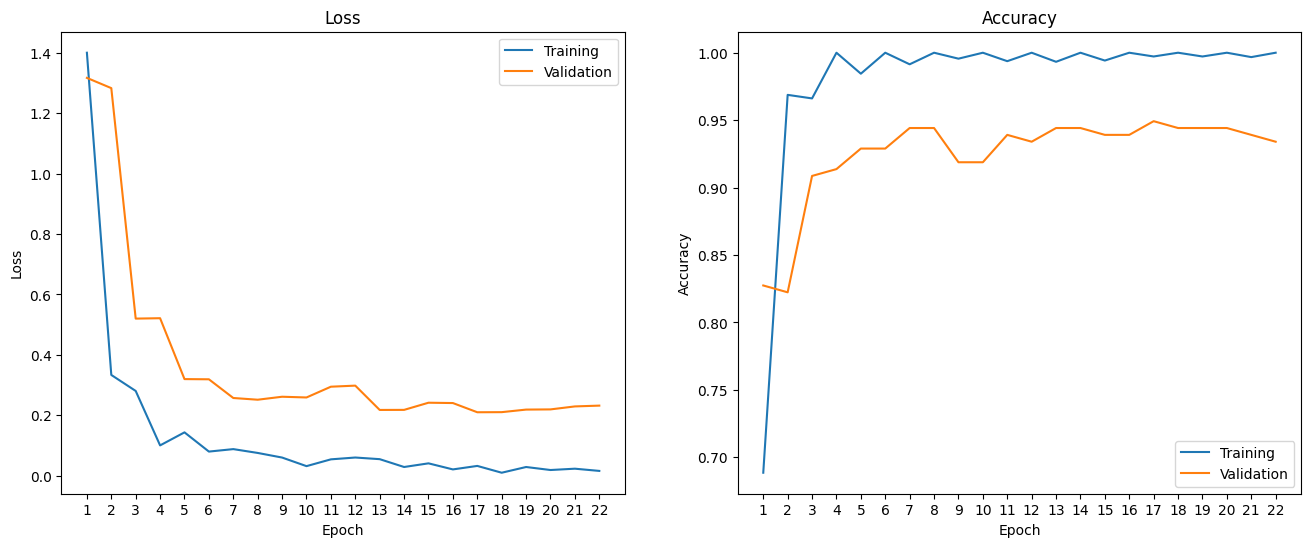

In [64]:
plot_history(histories_3)

In [65]:
y_test_predictions = get_predictions(model3, X_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step


In [66]:
# Calulate the overall accuracy on test set
##### YOUR CODE STARTS #####
test_accuracy = accuracy_score(y_test, y_test_predictions)
##### YOUR CODE ENDS #####
print(f'Test accuracy is {test_accuracy:.2f}')

Test accuracy is 0.96


In [67]:
# Accuracy for each individual class on test set
per_class_accuracy_score(y_test_predictions, y_test)

Class 0 accuracy: 1.0
Class 1 accuracy: 1.0
Class 2 accuracy: 1.0
Class 3 accuracy: 1.0
Class 4 accuracy: 1.0
Class 5 accuracy: 1.0
Class 6 accuracy: 1.0
Class 7 accuracy: 0.71
Class 8 accuracy: 0.92
Class 9 accuracy: 1.0
Class 10 accuracy: 1.0
Class 11 accuracy: 1.0
Class 12 accuracy: 1.0
Class 13 accuracy: 0.5
Class 14 accuracy: 1.0
Class 15 accuracy: 1.0
Class 16 accuracy: 1.0
Class 17 accuracy: 1.0
Class 18 accuracy: 1.0
Class 19 accuracy: 0.92
Class 20 accuracy: 1.0
Class 21 accuracy: 1.0
Class 22 accuracy: 1.0
Class 23 accuracy: 1.0
Class 24 accuracy: 1.0
Class 25 accuracy: 1.0
Class 26 accuracy: 1.0
Class 27 accuracy: 1.0
Class 28 accuracy: 1.0
Class 29 accuracy: 1.0
Class 30 accuracy: 0.8
Class 31 accuracy: 1.0
Class 32 accuracy: 1.0
Class 33 accuracy: 1.0
Class 34 accuracy: 1.0
Class 35 accuracy: 1.0
Class 36 accuracy: 1.0
Class 37 accuracy: 1.0
Class 38 accuracy: 1.0
Class 39 accuracy: 1.0
Class 40 accuracy: 1.0
Class 41 accuracy: 0.5
Class 42 accuracy: 1.0


<font color='red'> For how many classes your model showed zero accuracy? Did the performance improve comparing to the original and naively oversampled datasets?

Your answer: for none, yeah performance is improved


# Bonus exercises
**NB, these are optional exercises! You do not have to do them unless you feel like :)**


## Implement Attentive CutMix from scratch (up to 4 bonus points depending on presentation):
<font color='red'> Experimentally verify if Attentive CutMix augmentation helps to improve the test score on BelgiumTSC. Link to the Attentive CutMix paper: https://arxiv.org/pdf/2003.13048. Implement and show couple of examples images augmented with Attentive CutMix. Test its performance and visualise the corresponding accuracy and loss curves. Compare the results of model trained on Attentive CutMix augmented images to the model trained with regular data augmentation. </font>


In [68]:
##### YOUR CODE STARTS #####
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
from PIL import Image

# Load pretrained EfficientNetB0 model to generate attention maps
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False)

def preprocess_image(img, target_size=(224, 224)):
    """Resize image to target size and convert to array for processing."""
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def get_attention_map(img):
    """Generates an attention map using a pretrained model (EfficientNetB0)."""
    img_array = preprocess_image(img)
    feature_maps = efficientnet_model.predict(img_array)
    attention_map = np.mean(feature_maps[0], axis=-1)

    # Normalize the attention map for better visualization
    attention_map = (attention_map - attention_map.min()) / (attention_map.max() - attention_map.min())
    return attention_map

def plot_attention_map(img, attention_map):
    """Display image with overlayed attention map."""
    plt.imshow(img)
    plt.imshow(attention_map, cmap='jet', alpha=0.5)  # Overlay attention map
    plt.axis('off')
    plt.show()

def attentive_cutmix(img1, img2, top_n_patches=70):
    """Apply Attentive CutMix by selecting the top N attention patches from img1 and pasting them onto img2."""
    # Resize images to ensure consistency
    target_size = (224, 224)
    img1 = img1.resize(target_size)
    img2 = img2.resize(target_size)

    attention_map = get_attention_map(img1)

    # Rescale attention map to match the resized image size
    attention_map_rescaled = tf.image.resize(attention_map[..., np.newaxis], target_size)
    attention_map_rescaled = np.squeeze(attention_map_rescaled)

    # Display the attention map to verify it
    plot_attention_map(img1, attention_map_rescaled)

    # Get the indices of the top N patches with the highest attention
    patch_size = int(min(target_size) / 70)  # Divide image into a finer 7x7 grid
    patch_indices = np.argsort(attention_map_rescaled.ravel())[-top_n_patches:]
    patch_coords = [np.unravel_index(idx, attention_map_rescaled.shape) for idx in patch_indices]

    img1_array = np.array(img1)
    img2_array = np.array(img2)

    # Replace top N patches from img1 into img2 based on the attention map
    for (y, x) in patch_coords:
        start_x, start_y = x * patch_size, y * patch_size
        end_x, end_y = start_x + patch_size, start_y + patch_size
        print(f"Replacing patch at: start_x={start_x}, start_y={start_y}, end_x={end_x}, end_y={end_y}")

        # Ensure patch fits within the image boundaries
        if end_x <= target_size[0] and end_y <= target_size[1]:
            img2_array[start_y:end_y, start_x:end_x] = img1_array[start_y:end_y, start_x:end_x]

    return Image.fromarray(img2_array)
##### YOUR CODE ENDS #####

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


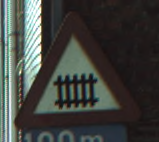

In [69]:
Image.open('./data/BelgiumTSC/00012/01473_00002.png')

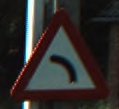

In [70]:
Image.open('./data/BelgiumTSC/00003/00207_00001.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


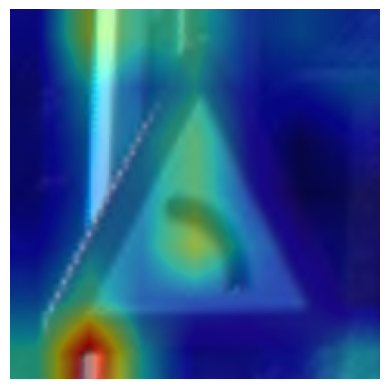

Replacing patch at: start_x=147, start_y=621, end_x=150, end_y=624
Replacing patch at: start_x=138, start_y=621, end_x=141, end_y=624
Replacing patch at: start_x=144, start_y=618, end_x=147, end_y=621
Replacing patch at: start_x=141, start_y=618, end_x=144, end_y=621
Replacing patch at: start_x=147, start_y=639, end_x=150, end_y=642
Replacing patch at: start_x=147, start_y=669, end_x=150, end_y=672
Replacing patch at: start_x=147, start_y=648, end_x=150, end_y=651
Replacing patch at: start_x=147, start_y=651, end_x=150, end_y=654
Replacing patch at: start_x=147, start_y=657, end_x=150, end_y=660
Replacing patch at: start_x=147, start_y=627, end_x=150, end_y=630
Replacing patch at: start_x=147, start_y=654, end_x=150, end_y=657
Replacing patch at: start_x=147, start_y=630, end_x=150, end_y=633
Replacing patch at: start_x=147, start_y=666, end_x=150, end_y=669
Replacing patch at: start_x=147, start_y=660, end_x=150, end_y=663
Replacing patch at: start_x=147, start_y=663, end_x=150, end_y

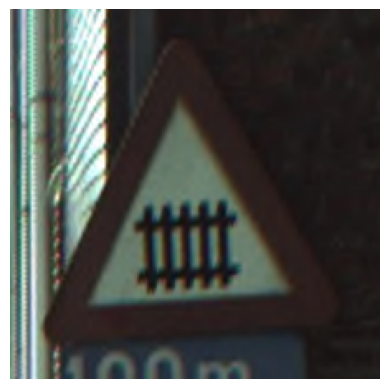

In [71]:
# Load and preprocess two example images
img1 = Image.open('./data/BelgiumTSC/00003/00207_00001.png').resize((224, 224))
img2 = Image.open('./data/BelgiumTSC/00012/01473_00002.png').resize((224, 224))

# Apply Attentive CutMix
augmented_image = attentive_cutmix(img1, img2)

# Display the augmented image
plt.imshow(augmented_image)
plt.axis('off')
plt.show()

<font color='red'> Please, keep in mind that we expect a lot from the bonus exercise solutions. In order to claim all points the solution must resemble a blog post with examples, figures, explanations, reasoning and nicely documented code.

# Comments (optional feedback to the course instructors)
Here, please, leave your comments regarding the homework, possibly answering the following questions:
* how much time did you send on this homework?
* was it too hard/easy for you?
* what would you suggest to add or remove?
* anything else you would like to tell us

Your comments:

# <font color='red'>  End of the homework. Please don't delete this cell.</font>